In [1]:
import tensorflow as tf
from tensorflow.keras.utils import normalize
import os
import cv2
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.optimizers import Adam
import glob

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Concatenate
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from keras.preprocessing.image import ImageDataGenerator
from pathlib import Path

image_names = glob.glob(r"c:\Users\richch\Desktop\ModSOCPristineTiffs\SOC\*.tif")
#returns list of files or folders that matches the path specified in the pathname argument
# print(image_names)
num_images = len(os.listdir(r"c:\Users\richch\Desktop\ModSOCPristineTiffs\SOC"))
#print(num_images)

image_names.sort()
image_names_subset = image_names[0:num_images]
images = [cv2.imread(img, 0) for img in image_names_subset]
x_test = np.array(images)

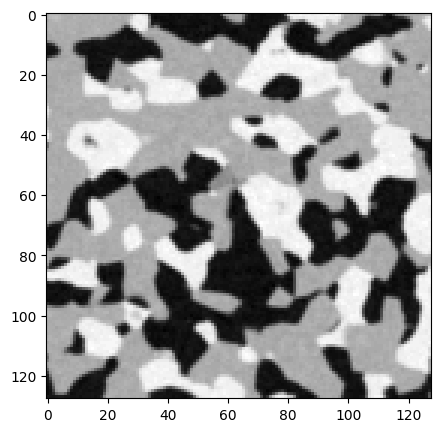

In [2]:
# We isolate one image from the array 
im = x_test[100, :, :]
plt.figure(figsize=(5,5))
plt.imshow(im, cmap='gray')
plt.show()

In [3]:
# This section loads the model
from keras.models import load_model
model_path = "c:\\Users\\richch\\Desktop\\VsCode\\SavedModels\\Vgg16_500Datasets_100epochsDropOut3.hdf5"
mymodel = load_model(model_path)

from keras.models import load_model
model = load_model(r"c:\Users\richch\Desktop\VsCode\SavedModels\Vgg16_500Datasets_100epochsDropOut3.hdf5", compile=False)

In [4]:
# We want to infer the model 
# im_for_infer = np.zeros((1, 128, 128, 1))
# im_for_infer[0, :, :, 0] = im


print(f"image dimensions: {im.shape}")
im_expanded = np.expand_dims(im, axis=-1)
im_expanded = np.expand_dims(im_expanded, axis=0)
print(f"image expanded dimensions: {im_expanded.shape}")

im_seg = model.predict(im_expanded.shape)

image dimensions: (128, 128)
image expanded dimensions: (1, 128, 128, 1)


ValueError: in user code:

    File "C:\Users\richch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 2341, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\richch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 2327, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\richch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 2315, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\richch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py", line 2283, in predict_step
        return self(x, training=False)
    File "C:\Users\richch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\richch\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'VGG16_U-Net' (type Functional).
    
    Input 0 of layer "block1_conv1" is incompatible with the layer: expected min_ndim=4, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer 'VGG16_U-Net' (type Functional):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=False
      • mask=None


In [ ]:
im_toplot = im_seg[0, :, :, 0]
plt.figure(figsize=(5,5))
plt.imshow(im_toplot, cmap='gray')
plt.show()

NameError: name 'im_seg' is not defined